#**Project Description**
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

#1).Problem Statement
To build a predictive model and find out the sales of each product at a particular store.Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

#2).Hypothesis Generation
**Store Level Hypotheses:**
1.   **City type:** Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
2.   **Population Density**: Stores located in densely populated areas should have higher sales because of more demand.
1.   **Store Capacity:** Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
2.   **Competitors:** Stores having similar establishments nearby should have less sales because of more competition.
1.   **Location:** Stores located within popular marketplaces should have higher sales because of better access to customers.
2.   **Ambiance:** Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

**Product Level Hypotheses:**


1.   **Brand:** Branded products should have higher sales because of higher trust in the customer.
2.   **Packaging:** Products with good packaging can attract customers and sell more.
1.   **Visibility in Store:** The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
2.   **Advertising:** Better advertising of products in the store will should higher sales in most cases.




#3).Loading Packages and Data

In [125]:
# 3. Loading Packages and Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [126]:
train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")

#4).Data Structure and Content

In [127]:
# Lets check the first five rows of dataset
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [128]:
# lets check the shape of dataset
train_data.shape

(8523, 12)

In [129]:
test_data.shape

(5681, 11)

In [130]:
# Let's get an overview of features datatype
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [131]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#5).Exploratory Data Analysis

In [132]:
# 5.1 Summary Statistics
print("Summary Statistics:")
print(train_data.describe())

Summary Statistics:
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


In [133]:
# handling data
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace('reg', 'Regular')
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace('reg', 'Regular')

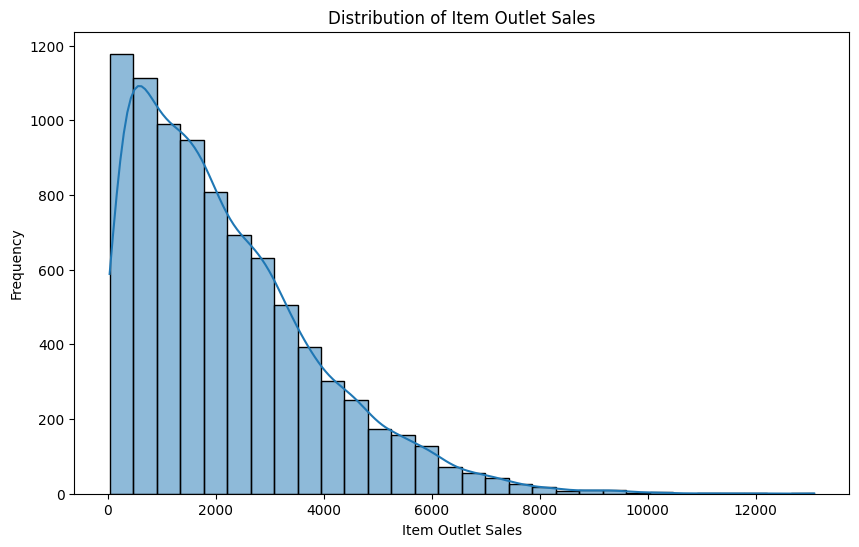

In [134]:
# 5.2 Distribution of Target Variable (Sales)
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Item_Outlet_Sales'], bins=30, kde=True)
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()

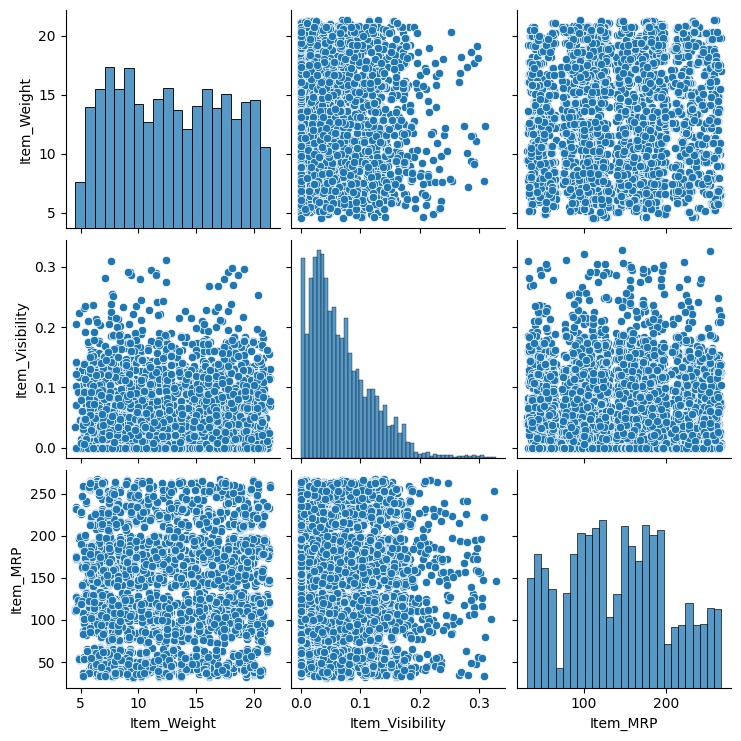

'Helps identify relationships between numeric variables.\nReveals potential outliers and patterns.'

In [135]:
# 5.3 Relationship between Numeric Variables(scatter plots)
numeric_variables = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
sns.pairplot(train_data[numeric_variables])
plt.show()
'''Helps identify relationships between numeric variables.
Reveals potential outliers and patterns.'''

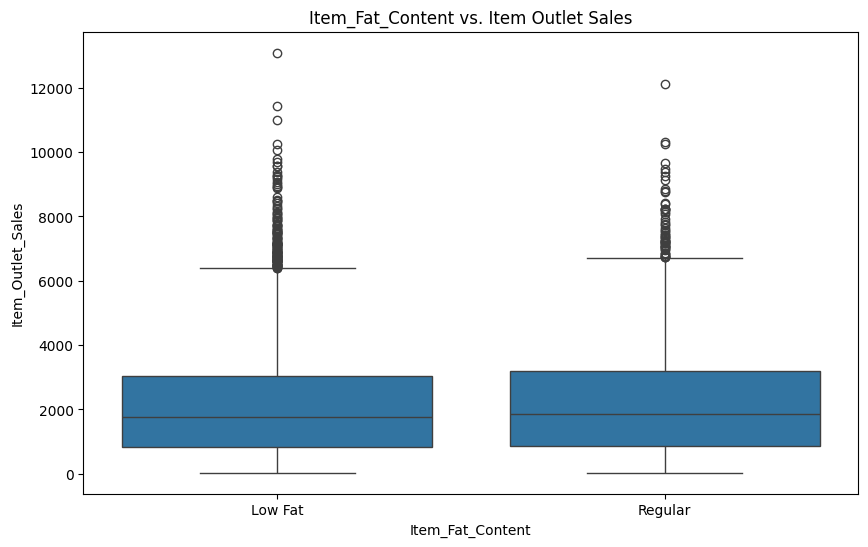

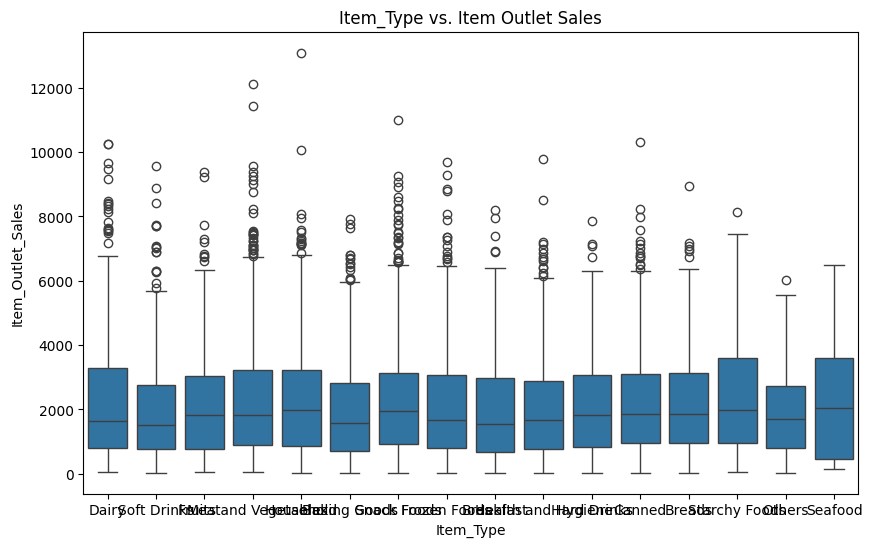

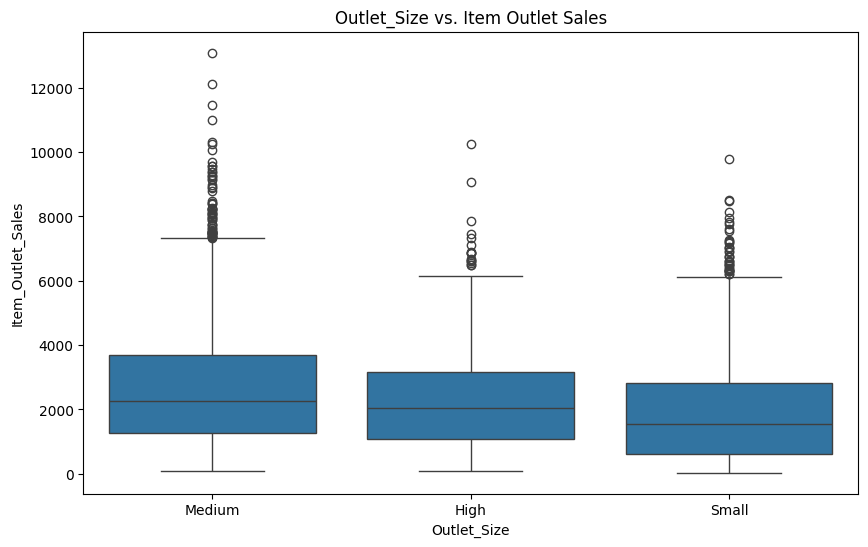

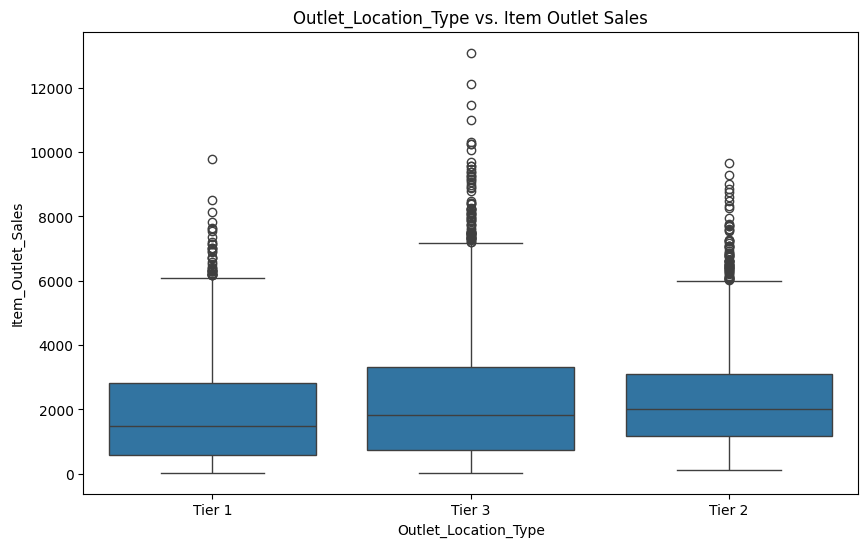

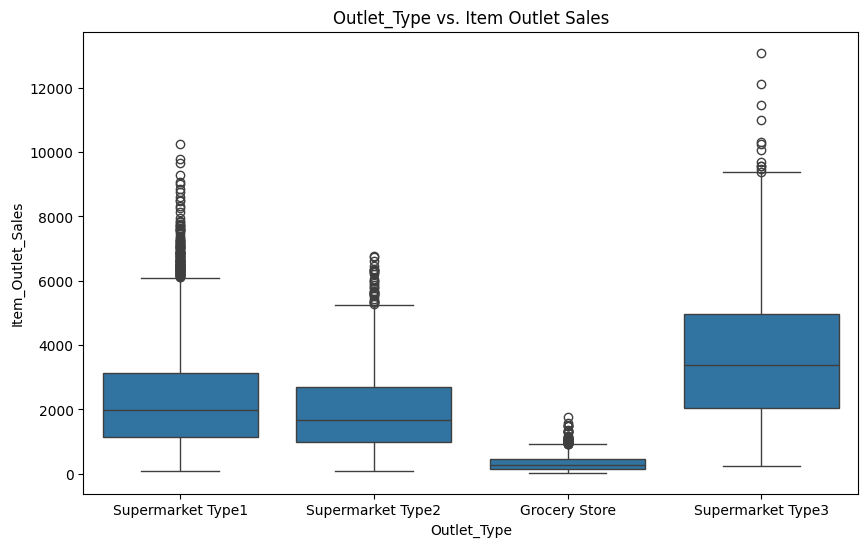

'Helps visualize the spread of sales for different categories.\nIdentifies potential variations in sales based on categorical variables.'

In [136]:
 #5.4 Relationship between Categorical Variables and Target(box plots)
categorical_variables = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for cat_var in categorical_variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cat_var, y='Item_Outlet_Sales', data=train_data)
    plt.title(f'{cat_var} vs. Item Outlet Sales')
    plt.show()
'''Helps visualize the spread of sales for different categories.
Identifies potential variations in sales based on categorical variables.'''

#6).Univariate Analysis

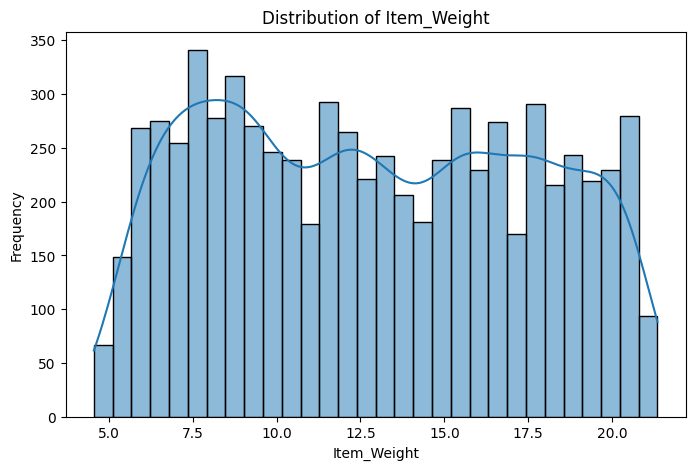

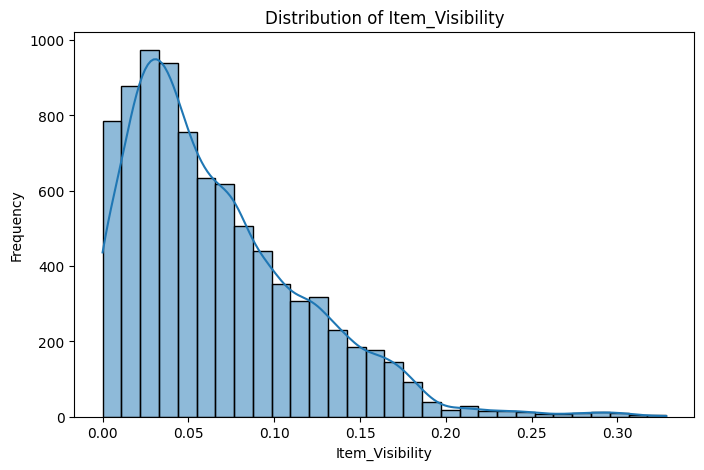

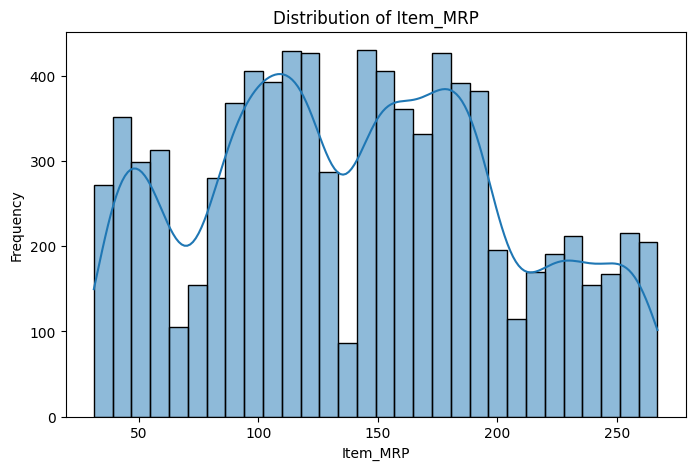

In [137]:
# 6.1 Distribution of Numeric Variables
numeric_variables = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

for num_var in numeric_variables:
    plt.figure(figsize=(8, 5))
    sns.histplot(train_data[num_var], bins=30, kde=True)
    plt.title(f'Distribution of {num_var}')
    plt.xlabel(num_var)
    plt.ylabel('Frequency')
    plt.show()
    '''Helps understand the range and distribution of each numeric variable.
Identifies patterns like skewness or multimodality'''

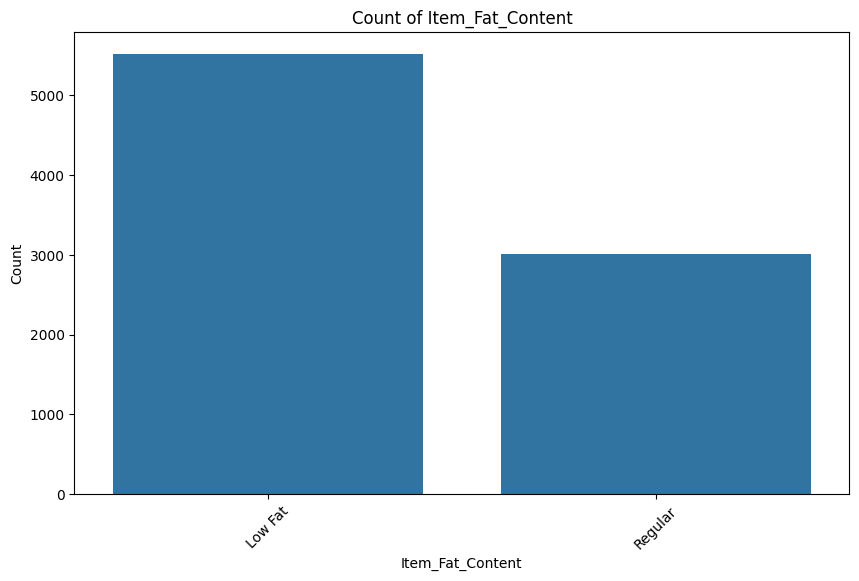

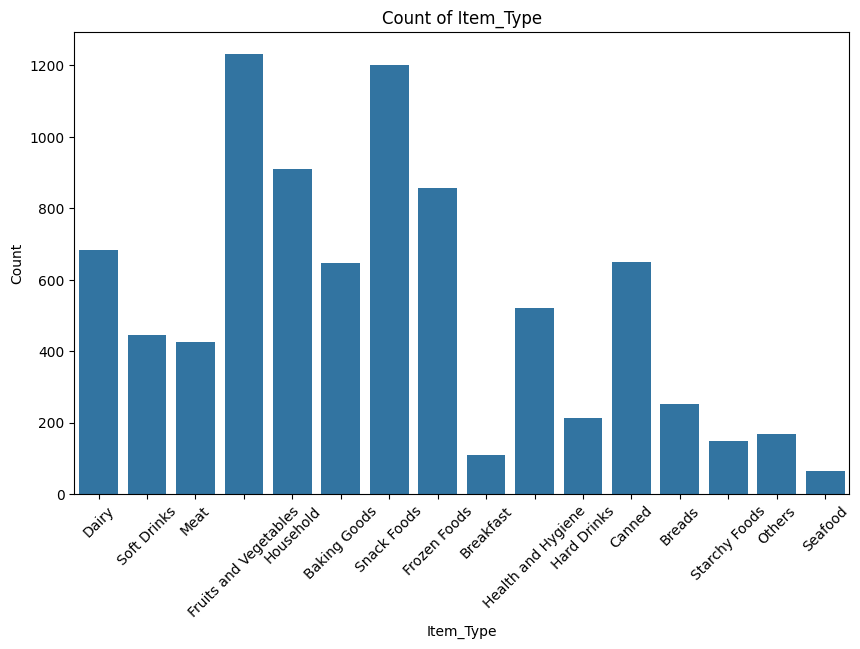

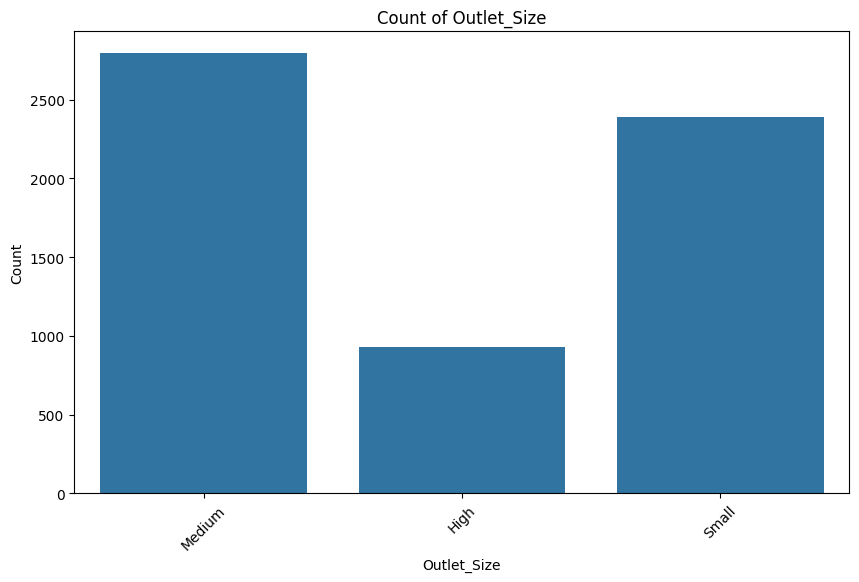

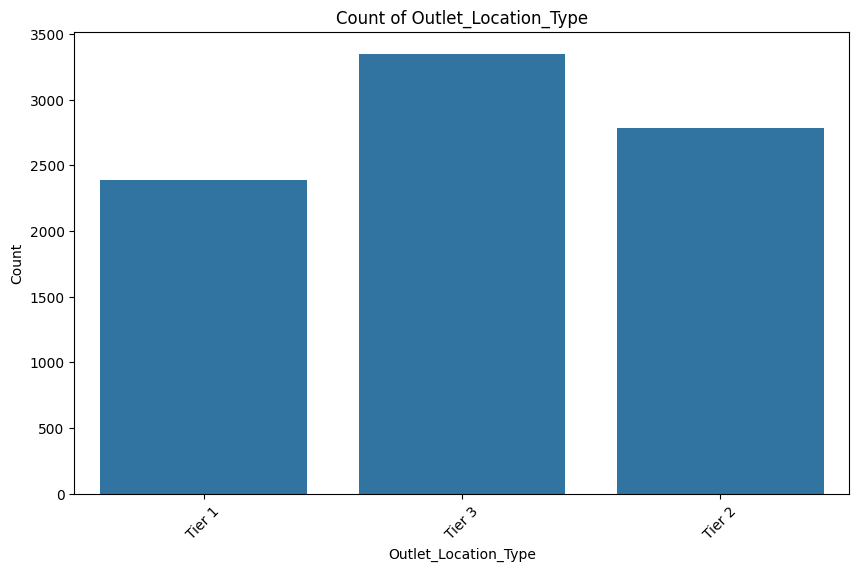

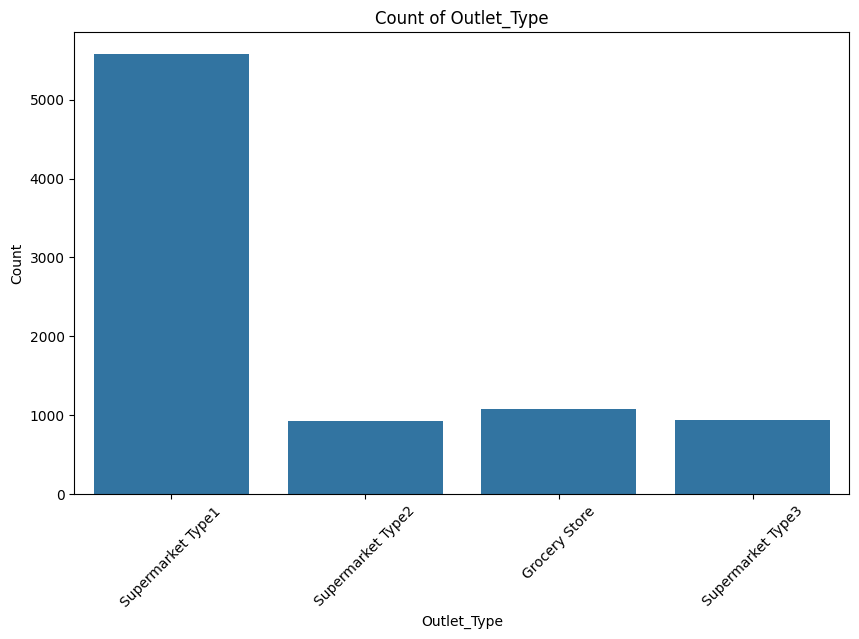

In [138]:
# 6.2 Count of Categorical Variables
categorical_variables = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for cat_var in categorical_variables:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=cat_var, data=train_data)
    plt.title(f'Count of {cat_var}')
    plt.xlabel(cat_var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    '''Helps understand the frequency of each category within a categorical variable.
Identifies imbalances in categorical distributions.'''

#7).Bivariate Analysis

<Figure size 1200x600 with 0 Axes>

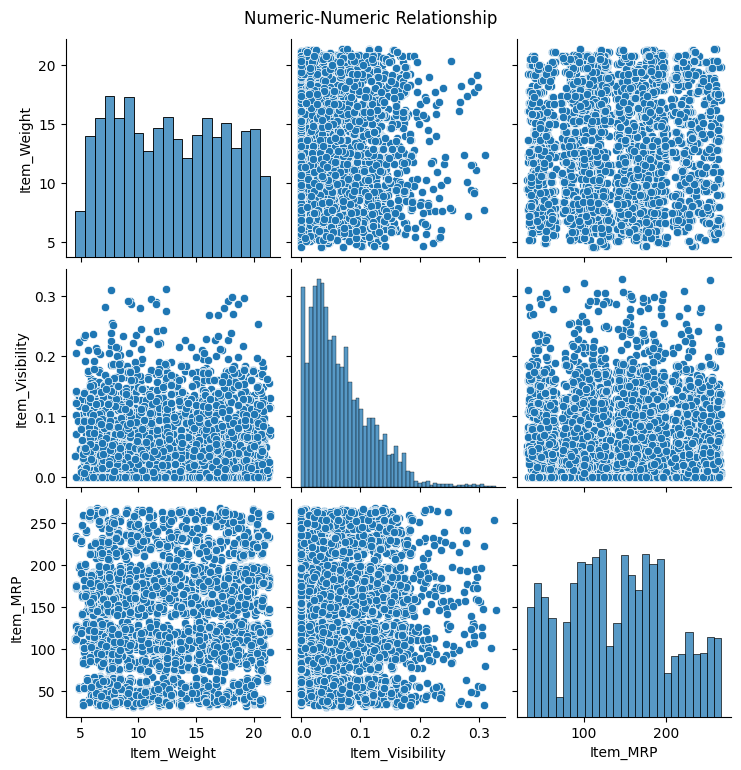

In [139]:
# 7.1 Numeric-Numeric Relationship
numeric_variables = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

plt.figure(figsize=(12, 6))
sns.pairplot(train_data, vars=numeric_variables, kind='scatter')
plt.suptitle('Numeric-Numeric Relationship', y=1.02)
plt.show()

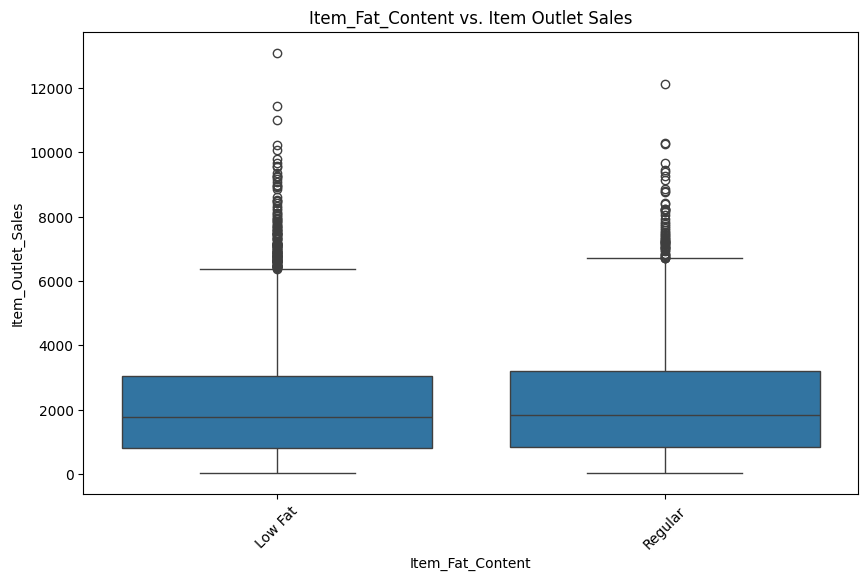

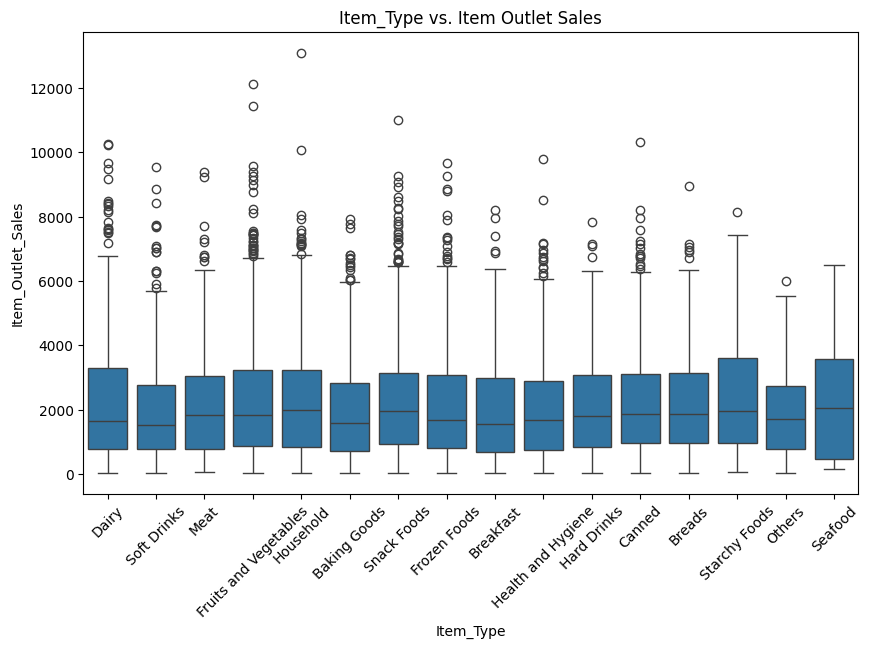

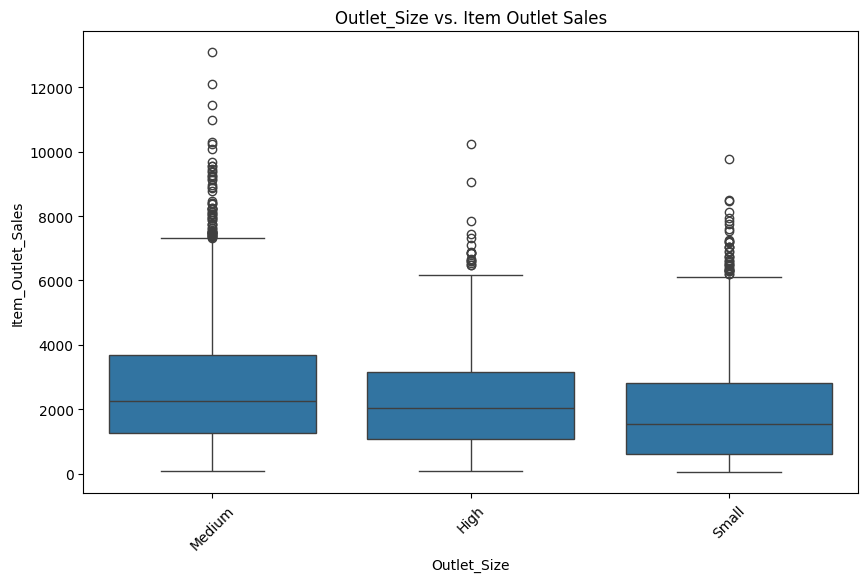

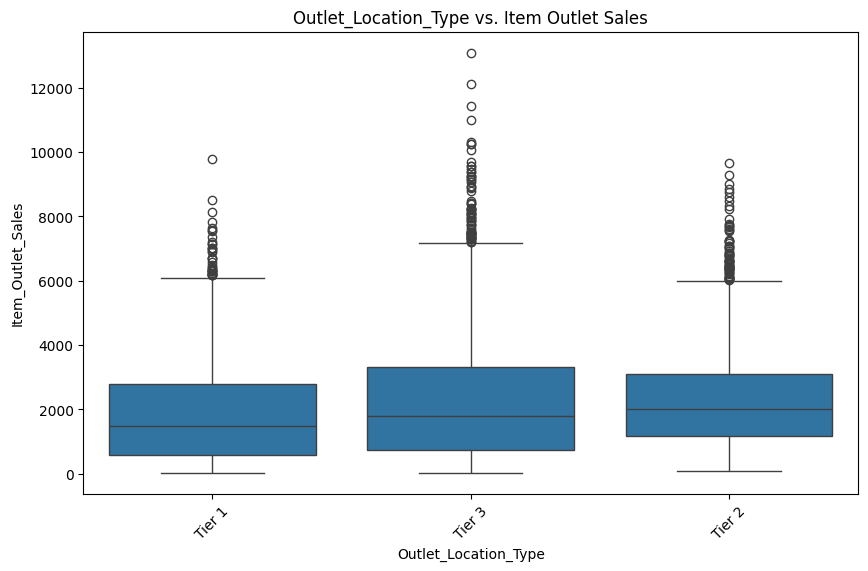

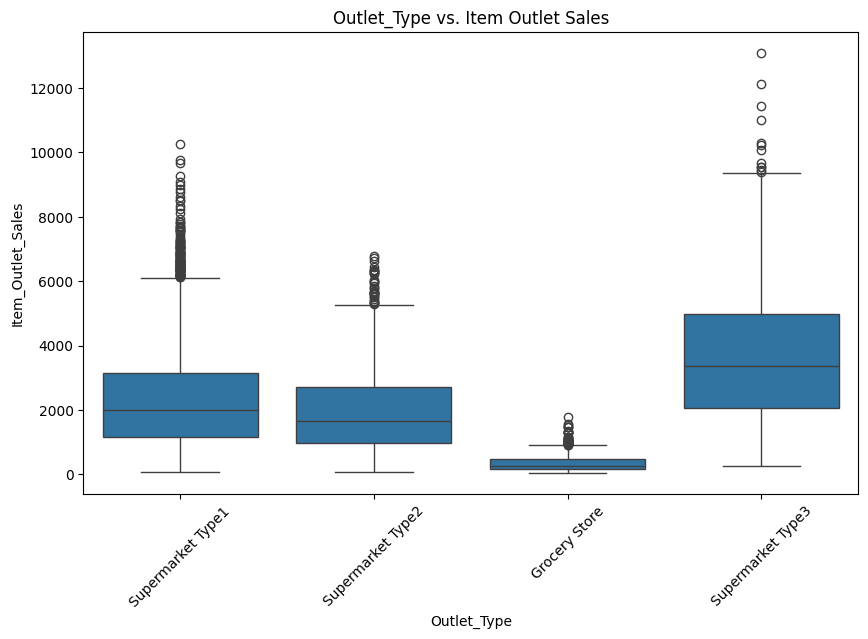

In [140]:
# 7.2 Categorical-Numeric Relationship
categorical_variables = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for cat_var in categorical_variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cat_var, y='Item_Outlet_Sales', data=train_data)
    plt.title(f'{cat_var} vs. Item Outlet Sales')
    plt.xticks(rotation=45)
    plt.show()

The output gives us following observations:


*   **Item_Fat_Content:** Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’.
*   **Item_Type:** Not all categories have substantial numbers. It looks like combining them can give better results.
*   **Outlet_Type:** Supermarket Type2 and Type3 can be combined. But we should check if that’s a good idea before doing it.





#8).Missing Value Treatment

In [141]:
# 8.1 Check for Missing Values
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [142]:
# 8.2 Impute Missing Values for Numeric Variables
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(),inplace=True)
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(),inplace=True)

In [143]:
# 8.3 Impute Missing Values for Categorical Variables
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0],inplace=True)
test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0],inplace=True)

train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#9).Feature Engineering

In [144]:
# 9.1 Creating new Columns
train_data['Item_Category'] = train_data['Item_Identifier'].astype(str).str[:2]
train_data['Item_Category'] = train_data['Item_Category'].replace(['FD', 'DR', 'NC'],['Food', 'Drink', 'Non-Consumable'])
train_data['Age_Outlet'] = 2024-train_data['Outlet_Establishment_Year']

test_data['Item_Category'] = test_data['Item_Identifier'].astype(str).str[:2]
test_data['Item_Category'] = test_data['Item_Category'].replace(['FD', 'DR', 'NC'],['Food', 'Drink', 'Non-Consumable'])
test_data['Age_Outlet'] = 2024-test_data['Outlet_Establishment_Year']

In [145]:
# 9.2 Binning in 'Outlet_Category'
bin = [1, 10, 20, 100]
outlet_cat = ['New Outlet', 'Moderate Outlet', 'Old Outlet']
train_data['Outlet_Category'] = pd.cut(train_data['Age_Outlet'], bins=bin, labels=outlet_cat)
test_data['Outlet_Category'] = pd.cut(test_data['Age_Outlet'], bins=bin, labels=outlet_cat)

#10).Encoding Categorical Variables

#11).Label Encoding

In [146]:
#Label Encoding on 'Item_Fat_Content'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_data['Outlet_Type']= label_encoder.fit_transform(train_data['Outlet_Type'])
train_data['Item_Type']= label_encoder.fit_transform(train_data['Item_Type'])

test_data['Item_Type']= label_encoder.fit_transform(test_data['Item_Type'])
test_data['Outlet_Type']= label_encoder.fit_transform(test_data['Outlet_Type'])


#12).One Hot Encoding

In [147]:
#12.1one hot encoding
train_data = pd.get_dummies(train_data, columns=['Item_Category','Outlet_Category','Outlet_Location_Type','Outlet_Size','Outlet_Type'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Item_Category','Outlet_Category','Outlet_Location_Type','Outlet_Size','Outlet_Type'], drop_first=True)

In [149]:
#12.2Drop Unnecessary Variables
train_data= train_data.drop(columns = ['Item_Fat_Content', 'Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'])
test_data = test_data.drop(columns = ['Item_Fat_Content', 'Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'])

#13).PreProcessing Data

In [151]:
from sklearn.preprocessing import StandardScaler

# 11.1 Standardize or Normalize Numerical Features
numerical_features = ['Item_Weight', 'Item_MRP','Item_Outlet_Sales']

scaler = StandardScaler()
train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])

In [152]:
# Define features and target variable
X_train = train_data.drop(['Item_Outlet_Sales'], axis=1)
y_train = train_data['Item_Outlet_Sales']

X_test = test_data

#14).Modeling

In [155]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the train_data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [160]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X_train, y_train):
    model.fit(X_train, y_train)

    pred = model.predict(X_train)

    cv_score = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))

    print("Model Report")
    print("MSE:",mean_squared_error(y_train,pred))
    print("CV Score:", cv_score)

#15).Linear Regression

Model Report
MSE: 0.44815850466139834
CV Score: 0.450338434071607


<Axes: title={'center': 'Model Coefficients'}>

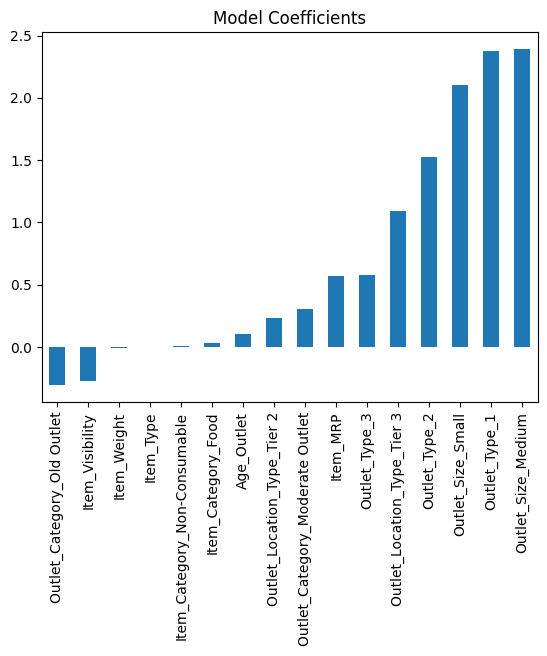

In [161]:
# Linear Regression
'''lr_model = LinearRegression()
lr_model.fit(X_train_split, y_train_split)
lr_predictions = lr_model.predict(X_val)
print('Linear Regression RMSE:', np.sqrt(mean_squared_error(y_val, lr_predictions)))'''

model = LinearRegression()
train(model, X_train_split, y_train_split)
coef = pd.Series(model.coef_, X_train_split.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

#16).Regularized Linear Regression

Model Report
MSE: 0.448375538024204
CV Score: 0.45041107068013037


<Axes: title={'center': 'Model Coefficients'}>

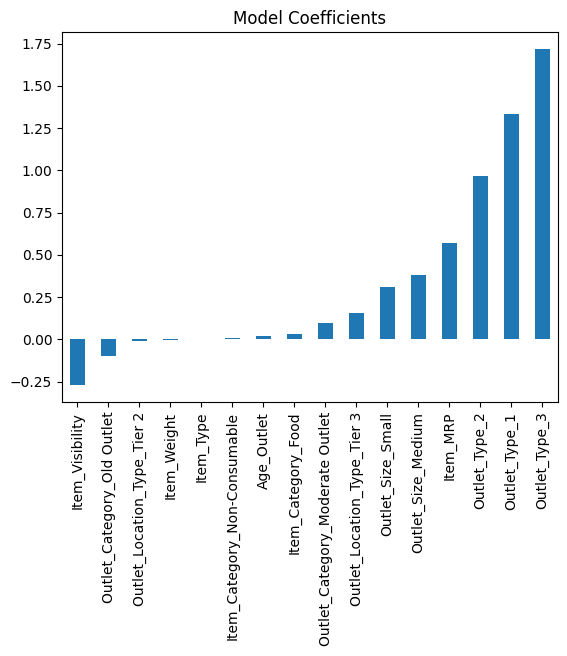

In [162]:
# Regularized Linear Regression (Ridge)
'''ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_split, y_train_split)
ridge_predictions = ridge_model.predict(X_val)
print('Ridge Regression RMSE:', np.sqrt(mean_squared_error(y_val, ridge_predictions)))'''

model = Ridge()
train(model, X_train_split, y_train_split)
coef = pd.Series(model.coef_, X_train_split.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

#17).RandomForest

Model Report
MSE: 0.06281892098657084
CV Score: 0.45895237290424384


<Axes: title={'center': 'Feature Importance'}>

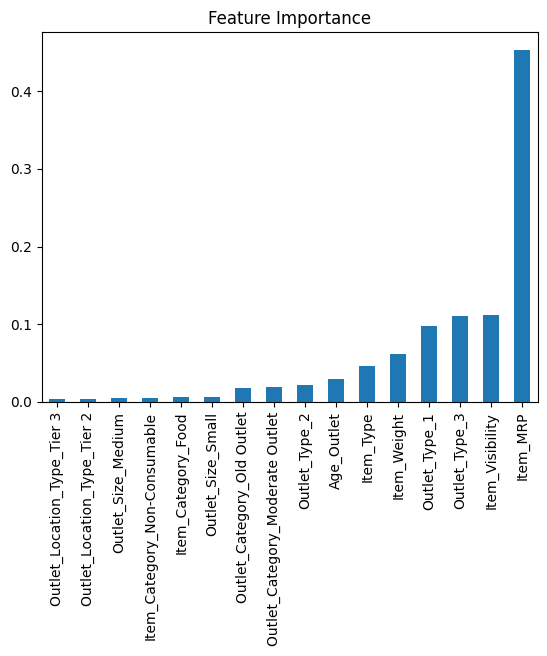

In [163]:
# RandomForest
'''rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_split, y_train_split)
rf_predictions = rf_model.predict(X_val)
print('RandomForest RMSE:', np.sqrt(mean_squared_error(y_val, rf_predictions)))'''

model = RandomForestRegressor()
train(model, X_train_split, y_train_split)
coef = pd.Series(model.feature_importances_, X_train_split.columns).sort_values()
coef.plot(kind='bar', title="Feature Importance")

#18).XGBoost

Model Report
MSE: 0.12805381148025938
CV Score: 0.5040319650954561


<Axes: title={'center': 'Feature Importance'}>

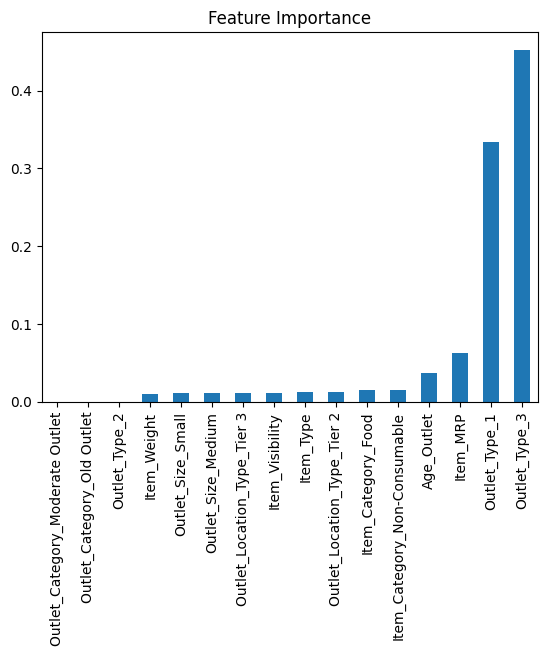

In [164]:
# XGBoost
'''xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)
xgb_model.fit(X_train_split, y_train_split)
xgb_predictions = xgb_model.predict(X_val)
print('XGBoost RMSE:', np.sqrt(mean_squared_error(y_val, xgb_predictions)))'''

model = xgb.XGBRegressor()
train(model, X_train_split, y_train_split)
coef = pd.Series(model.feature_importances_, X_train_split.columns).sort_values()
coef.plot(kind='bar', title="Feature Importance")

#19).Summary


*   **Linear Regression:**
MSE: 0.44815850466139834
*   **Regularized Linear Regression (Ridge):**
MSE: 0.448375538024204
*   **RandomForest:**
MSE: 0.06281892098657084
*   **XGBoost:**
MSE: 0.12805381148025938

**Model Comparison:**
*   RandomForest achieved the lowest MSE among the models, suggesting better performance in predicting sales.
*   Linear Regression and Regularized Linear Regression had similar MSE values, indicating comparable performance.

**Conclusion:**
*   The project successfully built and evaluated multiple regression models for predicting sales at BigMart stores.


